In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#  t==>> T-n
n_steps=3
data=[1,2,3,4,5,6,7,8,9]

In [3]:
x=[]
y=[]
for i in range(n_steps,len(data)):
    x.append(data[i-n_steps:i])
    y.append(data[i])

In [4]:
x,y=np.array(x),np.array(y)

In [5]:
x.shape#[rows,steps,feature]

(6, 3)

In [6]:
x=x.reshape((x.shape[0],x.shape[1],1))

In [7]:
x

array([[[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]],

       [[4],
        [5],
        [6]],

       [[5],
        [6],
        [7]],

       [[6],
        [7],
        [8]]])

In [8]:
x.shape

(6, 3, 1)

In [9]:
from keras.models import Sequential
from keras.layers import LSTM,Dense
model=Sequential()
model.add(LSTM(50,activation="relu",input_shape=(n_steps,1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [10]:
history=model.fit(x,y,epochs=300,batch_size=2,verbose=0)

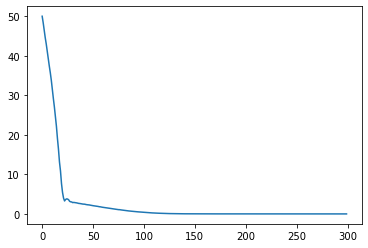

In [12]:
plt.plot(history.history["loss"])

In [13]:
xtest=np.array([7,8,9])
xtest=xtest.reshape((1,n_steps,1))

In [15]:
output=model.predict(xtest)
output

array([[9.837118]], dtype=float32)